<a href="https://colab.research.google.com/github/likeshd/tensorflow_modules/blob/main/Tensorflow_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("Boston.csv")

In [ ]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Dataset Link - https://github.com/selva86/datasets/blob/master/BostonHousing.csv

Attribute Information (in order):
- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per town
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to 1940
- DIS      weighted distances to five Boston employment centres
- RAD      index of accessibility to radial highways
- TAX      full-value property-tax rate per $10,000
- PTRATIO  pupil-teacher ratio by town
- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT    % lower status of the population

In [ ]:
X = data.drop(columns = ["medv"]) # Independent vars
y = data["medv"] # Target

In [ ]:
X.shape

(506, 13)

In [ ]:
y.shape

(506,)

### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(339, 13)
(339,)
(167, 13)
(167,)


### Neural Networks using Tensorflow

- Model Initialization - Define the network architecture
    - #Inputs
    - #Outputs
    - #Hidden Layers
    - #Units in HL
    - Activation Functions
- Model Compilation - Type of problem
    - Classification / Regression  - Loss function
        - Reg : MSE
        - Classfn : LogLoss/Cross Entropy
    - Optimizer
        - Stochastic Gradient Descent
        - Adam
        - RMSProp
        - AdaDelta
        - AdaGrad
    - Learning Rate
- Model Train/Fit
    - Dataset
        - Train
        - Validation
    - Iterations

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

In [ ]:
model = Sequential() # Empty model without any HL's
model.add(Input(13,))
model.add(Dense(units=2, activation="relu"))
model.add(Dense(units = 1))

In [ ]:
model.compile(optimizer="adam", loss="mean_squared_error") # MSE because of a regression problem or continuous output

In [ ]:
model.fit(x=X_train, y=y_train, epochs=150, validation_data=(X_test,y_test))

Epoch 1/150
11/11 [==============================] - 1s 18ms/step - loss: 32243.0332 - val_loss: 28934.2070
Epoch 2/150
11/11 [==============================] - 0s 4ms/step - loss: 26724.8262 - val_loss: 23811.7383
Epoch 3/150
11/11 [==============================] - 0s 6ms/step - loss: 21775.4609 - val_loss: 19367.0664
Epoch 4/150
11/11 [==============================] - 0s 6ms/step - loss: 17539.0215 - val_loss: 15561.3740
Epoch 5/150
11/11 [==============================] - 0s 7ms/step - loss: 14016.9443 - val_loss: 12304.1338
Epoch 6/150
11/11 [==============================] - 0s 7ms/step - loss: 10998.5469 - val_loss: 9626.7432
Epoch 7/150
11/11 [==============================] - 0s 6ms/step - loss: 8537.1855 - val_loss: 7479.0249
Epoch 8/150
11/11 [==============================] - 0s 6ms/step - loss: 6553.4600 - val_loss: 5772.5615
Epoch 9/150
11/11 [==============================] - 0s 6ms/step - loss: 5022.2378 - val_loss: 4398.4097
Epoch 10/150
11/11 [=======================

In [ ]:
model.history.history.keys()

dict_keys(['loss', 'val_loss'])

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
train_loss = model.history.history["loss"]
val_loss = model.history.history["val_loss"]

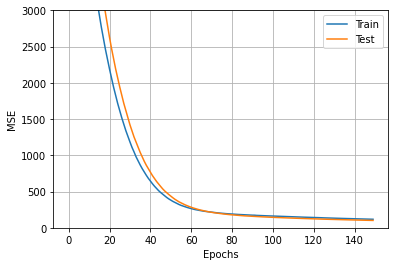

In [ ]:
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.ylim((0,3000))
plt.legend(["Train", "Test"])
plt.grid()
plt.show()

In [ ]:
model.predict(X_test)

6/6 [==============================] - 0s 4ms/step


array([[ 20.071281 ],
       [ 27.706919 ],
       [ 20.484219 ],
       [ 29.064194 ],
       [ 27.478945 ],
       [ 20.93245  ],
       [ 22.510527 ],
       [ 23.635958 ],
       [ 28.140003 ],
       [ 22.23587  ],
       [ 24.79125  ],
       [ 22.699686 ],
       [ -5.6644053],
       [ 24.524494 ],
       [ 22.15367  ],
       [ 28.196712 ],
       [ 26.256538 ],
       [ 26.152584 ],
       [ 27.51126  ],
       [ 26.932816 ],
       [ 29.147541 ],
       [ 28.486698 ],
       [ 17.86425  ],
       [ 21.453957 ],
       [ 20.632069 ],
       [ 24.032751 ],
       [ 26.922525 ],
       [ -7.7128158],
       [ 22.26556  ],
       [ 23.314913 ],
       [ 21.018553 ],
       [ 24.1111   ],
       [ 23.29743  ],
       [ 26.078005 ],
       [ 23.402243 ],
       [ 11.698818 ],
       [ 21.270971 ],
       [ 25.521729 ],
       [ 24.455526 ],
       [ 28.26104  ],
       [ 24.434996 ],
       [ 24.120867 ],
       [ 29.075344 ],
       [ 26.143677 ],
       [ 20.027569 ],
       [ 2